<a href="https://colab.research.google.com/github/wontwopunch/colab/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [87]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
import random
np.random.seed(1234)
random.seed(1234)

In [89]:
# 데이터 개요 파악 EDA
# EDA를 포함한 제목을 만나면 데이터 개요를 시각화하여 분석한 노트북 파일임을 예상

# 데이터의 행과 열 확인하기
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [90]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [91]:
# 데이터 속성 확인하기
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [92]:
# 수치 데이터: 질적 변수, 양적 변수
# 질적 변수: 분류, 수치와 수치 사이의 간격에 큰 의미가 없는 경우 ex. Pcalss
# 질적 변수: 명목 척도, 순서 척도(ex. Pclass)
# 양적 변수: 간격에 의미가 있는 수치 ex. Age, Fare
# 양적 변수: 간격 척도, 비례 척도(ex. Fare)

In [93]:
# 데이터의 통계량 확인하기
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [95]:
# 카테고리 변수 확인하기
# 데이터프레임명["열명"] : 개별 열에서 원하는 데이터를 추출 가능
# 데이터프레임에서 특정 열을 뽑아낸 데이터를 시리즈 Series
# 데이터프레임명["열명"].value_counts() : 열(Series)에 포함된 값들과 중복 횟수 파악

train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [96]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [97]:
# 결측치 확인하기
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
# 데이터의 시각화
# 데이터프레임에서 임의의 열 추출하기
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [99]:
# 시각화하고 싶은 데이터에서 결측치 제외하기
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [100]:
# Embarked와 Survived로만 집계하기
# 데이터프레임명.groupby(["집계하고 싶은 열명"]).집계 함수
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [101]:
# 데이터를 수평으로 변환하기 .unstack()
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()

In [102]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

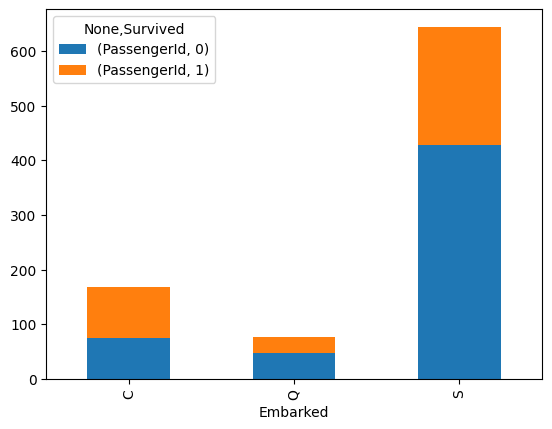

In [103]:
# 누적 막대 그래프로 시각화
embarked_df.plot.bar(stacked=True)

In [104]:
# 수치로 확인하기
# 데이터프레임명.iloc[행 번호, 열 번호] : 임의의 행과 열 추출 가능
embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [105]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

<Axes: xlabel='Sex'>

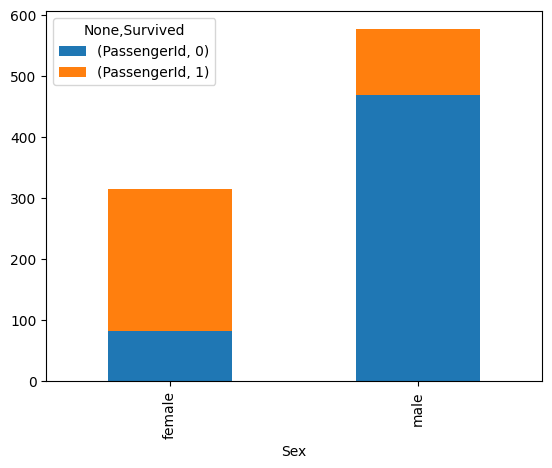

In [106]:
# 성별과 티켓 등급 시각화하기
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

<Axes: xlabel='Pclass'>

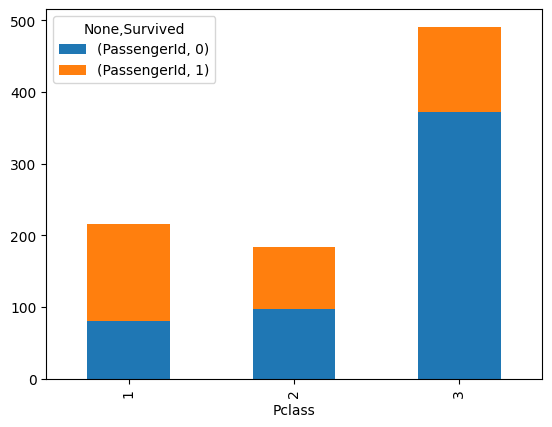

In [107]:
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

In [108]:
# 카테고리 변수를 더미 변수화하기
# 각 변수와 Survived 변수 간 상관성을 분석하고자 함
# 수치데이터로 변환 필요
# 우선 Sex, Embarked 변환
# 카테고리 변수를 수치 데이터로 변환하려면 원-핫 인코딩 one-hot encoding
# 원-핫 인코딩: 어떤 카테고리 변수에 대하여 그 값인지 여부를 1,0으로 나타내는 방법 → "더미dummy 변수화한다"
# ex. Sex를 더미 변수화하면 male과 female이라는 더미 변수가 두 개 생성
# pd.get_dummies(df명, columns=["변수화하고 싶은 열명"])

train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])

In [109]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


In [110]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


In [111]:
print(train_df_corr.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [112]:
# 'Name', 'Ticket', 'Cabin' 열을 제거한 새로운 데이터 프레임 생성
train_df_filtered = train_df_corr.drop(columns=['Name', 'Ticket', 'Cabin'])

In [113]:
# 이미 변환된 열을 제외한 나머지 범주형 데이터 원-핫 인코딩
train_df_filtered = pd.get_dummies(train_df_filtered, drop_first=True)

In [114]:
train_corr = train_df_filtered.corr()

In [115]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<Axes: >

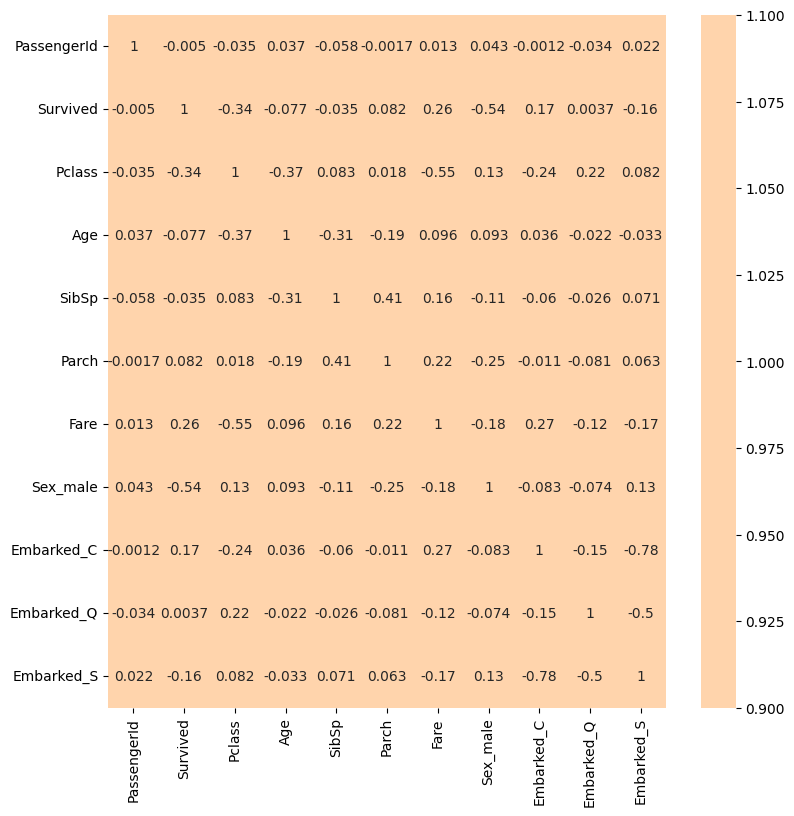

In [116]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmax=1, vmin=1, center=0, annot=True)

In [117]:
# 학습데이터와 테스트데이터 통합
# 두 데이터를 모두 이용하여 전체 집계나 통계 정보를 얻기 위함
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [118]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [119]:
# 전체 데이터로 결측치 수 확인하기
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [120]:
# 결측치 메우기(Fare)
# Pclass별 Fare 평균을 구하고, Pclass의 평균값으로 해당 결측치를 채우는 방법 사용
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

In [121]:
# 열명 변경
Fare_mean.columns = ["Pclass", "Fare_mean"]

In [122]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [123]:
# 결측치 채우기
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
# Fare 열의 결측치를 모두 채웠으므로 Fare_mean 열은 더 이상 필요하지 않음
all_df = all_df.drop("Fare_mean", axis=1)

In [124]:
# Name 결측치
all_df["Name"].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [125]:
name_df = all_df["Name"].str.split("[,.]", n=2, expand=True)

In [126]:
name_df.columns = ["family_name", "honorific", "name"]

In [127]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [128]:
# 선두와 말미 공백 문자 제거
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [129]:
# 호칭마다 인원수 세기
name_df["honorific"].value_counts()

honorific
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [130]:
# 호칭별 연령 분포
# all_df, name_df 결합
all_df = pd.concat([all_df, name_df], axis=1)

In [131]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

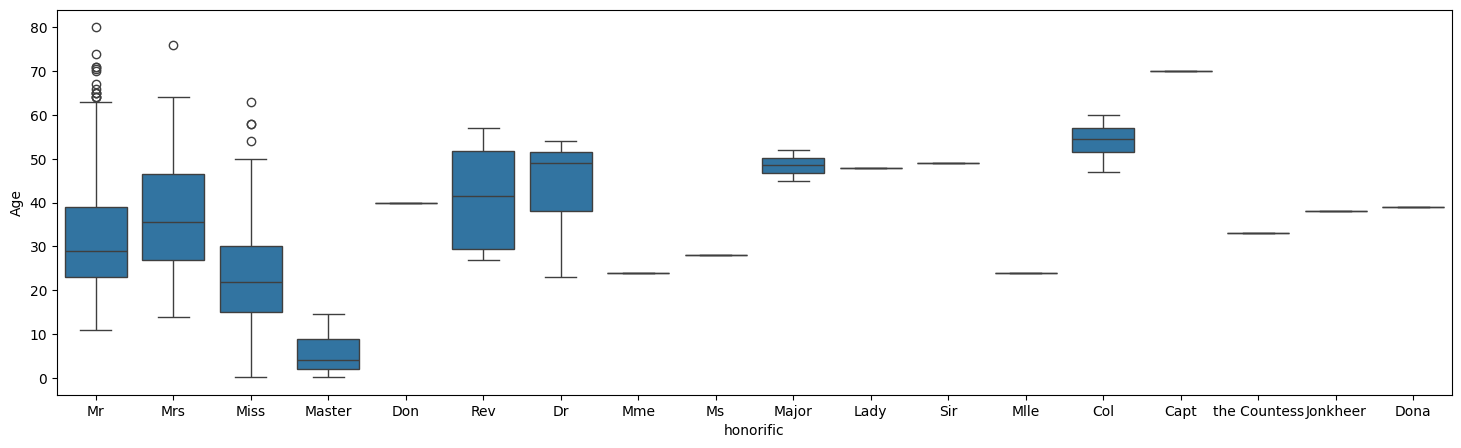

In [132]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

In [133]:
# 호칭별 연령 평균값
all_df[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [134]:
# 호칭별 생존율 차이
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)], axis=1)

<Axes: xlabel='honorific'>

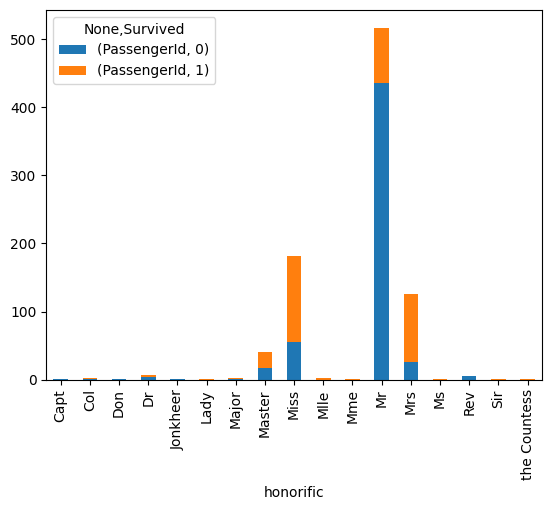

In [135]:
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

In [136]:
# 연령의 결측치를 호칭별 평균 연령으로 보완
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis=1)

In [137]:
# 가족 인원수 추가
# 가족과 관련한 변수 두 개 더해 가족 인원수 변수 생성
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

family_num
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

In [138]:
# 홀로 승선 여부 새로운 변수 추가
all_df.loc[all_df["family_num"]==0, "alone"] = 1
all_df["alone"].fillna(0, inplace=True)

In [139]:
# 불필요한 변수 삭제
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis=1)

In [140]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [141]:
# 카테고리 변수 수치로 변환
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [142]:
# Mr, Miss, Mrs, Master 이외 other로 통합
all_df.loc[~((all_df["honorific"]=="Mr")|(all_df["honorific"]=="Miss")|(all_df["honorific"]=="Mrs")|(all_df["honorific"]=="Master")), "honorific"] = "other"

In [143]:
all_df.honorific.value_counts()

honorific
Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: count, dtype: int64

In [144]:
from sklearn.preprocessing import LabelEncoder

In [145]:
# LabelEncoder()는 결측치가 있으면 작동하지 않음
# 결측치 missing 임의의 문자열로 미리 치환
all_df["Embarked"].fillna("missing", inplace=True)

In [146]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [147]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [148]:
for cat in categories:
  le = LabelEncoder()
  print(cat)
  if all_df[cat].dtypes == "object":
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [149]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


In [150]:
# 모든 데이터를 train과 test로 되돌리기
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

In [151]:
! pip install lightgbm==2.3.1

In [152]:
import lightgbm as lgb

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [154]:
# 과적합을 피하려면 학습 데이터에서 검증 데이터를 분리하는 과정이 필요
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

# X_train, y_train 데이터로 모델 학습 → X_valid의 예측 정확도 확인
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [155]:
# 하이퍼파라미터 설정
lgbm_params = {
    "objective" : "binary",
    "random_seed" : 42
}

In [156]:
# LightGBM으로 머신러닝 모델 학습시키기
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.465597
[20]	valid_0's binary_logloss: 0.42253
[30]	valid_0's binary_logloss: 0.424173
[40]	valid_0's binary_logloss: 0.438413
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.417458


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [157]:
# 각 변수의 중요도 조사하기
model_lgb.feature_importance()

array([ 32,  18, 203,  14,   9, 256,  26,   5,  19,   1], dtype=int32)

<Axes: >

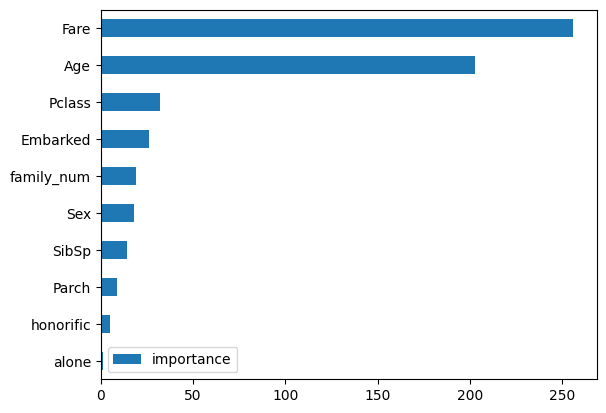

In [158]:
# 데이터의 열명 표시
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns,
                          columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

In [159]:
# 모델을 검증 데이터에 적용하기
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [160]:
# 예측 정확도 출력하기
# 정확도를 계산하는 라이브러리 불러오기
from sklearn.metrics import accuracy_score

In [161]:
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

In [164]:
# 정확도 개선을 위해 하이퍼파라미터 변경하기
lgbm_params = {
    "objective":"binary",
    "max_bin":331,
    "num_leaves":20,
    "min_data_in_leaf":57,
    "random_seed":42
}

In [166]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.470659
[20]	valid_0's binary_logloss: 0.425654
[30]	valid_0's binary_logloss: 0.413748
[40]	valid_0's binary_logloss: 0.410545
[50]	valid_0's binary_logloss: 0.412232
[60]	valid_0's binary_logloss: 0.407988
[70]	valid_0's binary_logloss: 0.407494
[80]	valid_0's binary_logloss: 0.410995
[90]	valid_0's binary_logloss: 0.413203
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.406565


In [167]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [168]:
accuracy_score(y_valid, np.round(y_pred))

0.8491620111731844

In [169]:
# 3-fold 교차 검증하기
folds=3
kf = KFold(n_splits=folds)

In [171]:
# 빈 리스트 models 생성
models = []
# 세 개로 나뉜 데이터로 학습하므로 모델도 세 개가 만들어짐
# 이 모델들이 차례대로 models 리스트에 들어갈 예정
# 각각 데이터의 인덱스는 train_index, val_index로 저장
for train_index, val_index in kf.split(train_X):
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index]

# LightGBM용 데이터를 생성한 후 하이퍼파라미터를 사용하여 학습
# 예측 정확도를 산출하면 append()로 처음에 만든 models의 리스트에 학습이 끝난 모델들을 저장
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)

lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets=lgb_eval,
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
print(accuracy_score(y_valid, np.round(y_pred)))
models.append(model_lgb)

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 20 rounds
[10]	valid_0's binary_logloss: 0.471854
[20]	valid_0's binary_logloss: 0.412579
[30]	valid_0's binary_logloss: 0.393023
[40]	valid_0's binary_logloss: 0.385434
[50]	valid_0's binary_logloss: 0.38159
[60]	valid_0's binary_logloss: 0.378753
[70]	valid_0's binary_logloss: 0.376992
[80]	valid_0's binary_logloss: 0.375146
[90]	valid_0's binary_logloss: 0.379274
[100]	valid_0's binary_logloss: 0.381002
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.375146
0.8282828282828283


In [172]:
# 테스트 데이터의 예측 결과 산출하기
preds = []

for model in models:
  pred = model.predict(test_X)
  preds.append(pred)

In [173]:
# 예측 결과의 평균 구하기
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [179]:
preds_int = (preds_mean > 0.5).astype(int)

In [182]:
submission = pd.DataFrame()
submission["Survived"] = preds_int

In [183]:
submission

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [184]:
submission.to_csv("titanic_submit01.csv", index=False)